# The Best Neighborhood by arrests, building violations, and obesity rates
# Team: Big 10
## Data
The data from the WPRDC we used in this project consists of:

Pittsburgh PLI Violations:
https://data.wprdc.org/dataset/pittsburgh-pli-violations-report/resource/4e5374be-1a88-47f7-afee-6a79317019b4

Allegheny County Obesity Rates:
https://data.wprdc.org/dataset/allegheny-county-obesity-rates/resource/fce248f0-8697-4d2a-bbe0-2da826776bfa

Pittsburgh Arrests:
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

## Metric
Our metric equally weighs each aspect, so the ranking of a neighborhood in any aspect is at most one third of the best possible score of 3.0. To calculate this, a neighborhood's ranking is seen as a ratio, with 1.0 being the best and 0.0 being the worst, and that ratio is added to its total score. The neighborhood with the total score closest to 3.0 is deemed the best.

In [1]:
# total scores for each neighborhood
totals = dict()
#all neighborhood names that can vary
overlap = {
        "California-Kirkbride":["California Kirkbride"],
        "Central Northside":["Central North Side"],
        "Crawford-Roberts":["Crawford Roberts"],
        "Mount Oliver":["Mount Oliver Neighborhood","Mt. Oliver","Mt. Oliver Boro","Mt. Oliver Neighborhood"],
        "North Oakland":["North oakland"],
        "Spring Hill-Cityview":["Spring Hill-City View"],
        "Troy Hill":["Troy Hill-Herrs Island","Troy Hill/Herr's Island"],
        "West Oakland":["West oakland"]
}
#sums overlapping neighborhoods
def sum_names(d):
    for n in overlap.keys():
        if n not in d:
            d[n]=0
        for o in overlap[n]:
            try:
                d[n]+=d[o]
                d.pop(o)
            except KeyError:
                pass
        if d[n]==0: # no data
            d.pop(n)
    return d
#averages overlapping neighborhoods
def avg_names(d):
    for n in overlap.keys():
        if n not in d:
            d[n]=0
        count = 1
        avg = d[n]
        for o in overlap[n]:
            try:
                avg+=d[o]
                count+=1
                d.pop(o)
            except KeyError:
                pass
        d[n]=avg/count
        if d[n]==0: # no data
            d.pop(n)
    return d
#add to global totals
def add_to_totals(d,totals,initial=False):
    culled_totals = dict()
    for i,n in enumerate(d):
        if n in totals:
            culled_totals[n]=totals[n]+(i/len(d))
        else:
            if initial:
                culled_totals[n]=i/len(d)
    return culled_totals


## Ian - Building violations

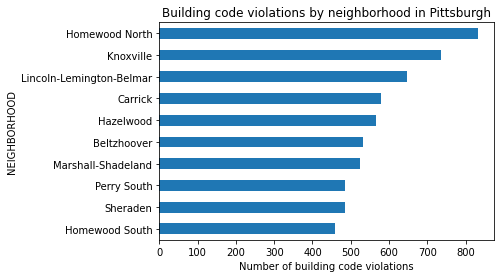

In [2]:
# imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# read in the violation data
violations = pd.read_csv("building-violations.csv")
# get only rows with violations found, then count how many rows of this kind are in each neighborhood and sort
violations = violations.loc[violations["INSPECTION_RESULT"]=="Violations Found"].groupby('NEIGHBORHOOD').size().sort_values()
# set up plot
plt.xlabel("Number of building code violations")
plt.ylabel("Neighborhood")
plt.style.use("seaborn-white")
# plot the neighborhoods with the most violations
violations.tail(10).plot(kind="barh",
title="Building code violations by neighborhood in Pittsburgh")


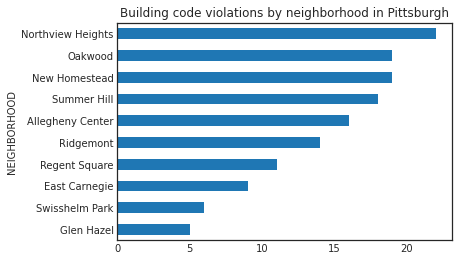

In [3]:
# plot the neighborhoods with the fewest violations
violations.head(10).plot(kind="barh",
title="Building code violations by neighborhood in Pittsburgh")

## Conclusion

Building code violations are a good indicator of the quality of housing in a neighborhood, which is an important factor in picking the best neighborhood.
The neighborhoods with the lowest building code violations, not accounting for the size of the neighborhood, are East Carnegie, Swisshelm Park, and Glen Hazel, while the worst are Homewood North, Knoxville, and Lincoln-Lemington-Belmar.

The strongest similarity between the neighborhoods with the fewest violations is their small size. This is not a strong correlation, though, because the neighborhoods with the most violations include (but are not exclusively made up of) small areas as well. For example, the top two neighborhoods in terms of violation count are under half a sq mile in size, but Lincoln–Lemington–Belmar, the third highest, is 1.812 sq miles.

In [4]:
# calculate scores and add to totals
vd = violations.to_dict()
vd = sum_names(vd)
vd = pd.DataFrame.from_dict(vd,"index").sort_values(0,ascending=False).to_dict()[0]
totals=add_to_totals(vd,totals,True)
pd.DataFrame.from_dict(totals,"index").sort_values(0,ascending=False)

,0
Glen Hazel,0.988889
Swisshelm Park,0.977778
East Carnegie,0.966667
Regent Square,0.955556
Ridgemont,0.944444
...,...
Hazelwood,0.044444
Carrick,0.033333
Lincoln-Lemington-Belmar,0.022222
Knoxville,0.011111


## Andres - Arrest Count

## INTRODUCTION 
Here, I am going to look at which neighborhood in Pittsburgh is the "best," and which is the "worst" using a dataset that contains information on where arrests took place. To determine this, I am going to be assuming the role of a middle-aged parent with a family looking to find a neighborhood to move to. I will be looking at which neighborhood has the least amount of arrests to conclude if it is the "best" to potentially live in, as well as which has the most to conclude it is the "worst" so I know not to move there.

In [5]:
arrests = pd.read_csv("PittArrests.csv")

Here, we are getting rid of the excess columns to focus on the one that will includes our metric.

In [6]:
arrests2 = arrests.drop(['PK','CCR','AGE' ,'GENDER','RACE', 'ARRESTTIME',
                        'ARRESTLOCATION', 'OFFENSES','INCIDENTLOCATION','INCIDENTZONE','INCIDENTTRACT',
                        'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION','X','Y'], axis=1)

arrests2

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
44267,North Shore
44268,Banksville
44269,Point Breeze
44270,Homewood North


I want to now do a count of the number of arrests per neighborhood so I can make graphs.

In [7]:
arrcount=arrests2['INCIDENTNEIGHBORHOOD'].value_counts()
arrcount

Central Business District    2712
South Side Flats             2295
Carrick                      1608
East Allegheny               1505
Homewood South               1429
                             ... 
Central Northside              23
Regent Square                  22
Mt. Oliver Boro                16
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

There are so many neighborhoods in Pittsburgh. To make one big graph containing each one would be way too crowded. With that being said, I'm going to make two graphs. One for the top 10 neighborhoods with the most arrests, and one for the top 10 neighborhoods with the least arrests.

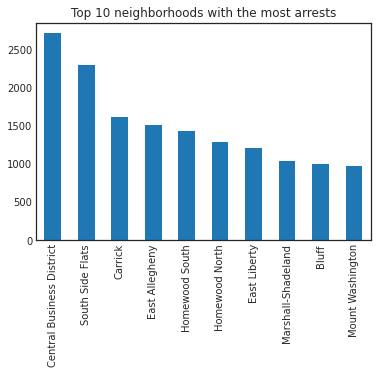

In [8]:
arrcount.head(10).plot(kind='bar',title= "Top 10 neighborhoods with the most arrests")

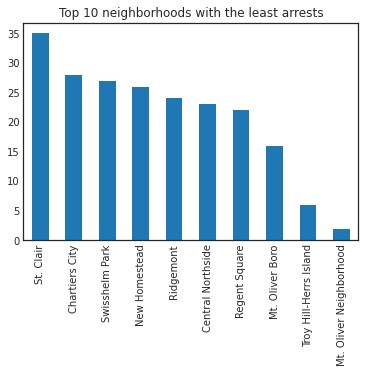

In [9]:
arrcount.tail(10).plot(kind='bar', title = "Top 10 neighborhoods with the least arrests")

## Conclusion
Out of the top 10 neighborhoods with the MOST arrests, the Central Business District has the most arrests, making it the "worst" neighborhood in terms of having the most arrests. According to my metric, these 10 neighborhoods are the 10 "worst" due to them having the top 10 most arrests.

Out of the top 10 neighborhoods with the LEAST arrests, Mt. Oliver Neighborhood has the least arrests, making it the "best" neighborhood. This does not take away from the other neighborhoods on this graph, because they are the top 10 "best" in terms of having the least arrests. With that being said, I would like to live in any of these neighborhoods because they are the best, but the best of the best is Mt. Oliver Neighborhood according to the metric I chose.

In [10]:
# calculate scores and add to totals
ad = arrcount.to_dict()
ad = sum_names(ad)
ad = pd.DataFrame.from_dict(ad,"index").sort_values(0,ascending=False).to_dict()[0]
totals=add_to_totals(ad,totals)
pd.DataFrame.from_dict(totals,"index").sort_values(0,ascending=False)

,0
Regent Square,1.944917
Swisshelm Park,1.935225
Ridgemont,1.923168
East Carnegie,1.892199
New Homestead,1.879196
...,...
Homewood South,0.142553
Marshall-Shadeland,0.141135
Knoxville,0.117494
Carrick,0.054610


## Nicole - Obesity Rates


In [11]:
# load data from a downloaded data set
obesity_rates = pd.read_csv("obesity_rates.csv")

obesity_rates

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
...,...,...,...,...,...,...,...,...
411,Pennsylvania,42003980600,210800,980600,PITTSBURGH,Pittsburgh,Chateau,0.439386
412,Pennsylvania,42003980700,192100,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375
413,Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,0.121487
414,Pennsylvania,42003981800,120300,NaN,PITTSBURGH,Pittsburgh,Lincoln-Lemington-Belmar,0.574293


In [12]:
# removing irrelevant columns 
data = obesity_rates.drop(['stname', 'tractfips', '2000 Tract', '2010 Tract', 'MUNICIPALITY', 'Municipality'], axis=1)

data

,City Neighborhood,2006-2010 estimate of obesity
0,Bluff,0.246936
1,Central Business District,0.668012
2,Strip District,0.369996
3,Crawford Roberts,0.488691
4,West oakland,0.366391
...,...,...
411,Chateau,0.439386
412,South Shore,0.354375
413,North Shore,0.121487
414,Lincoln-Lemington-Belmar,0.574293


Above shows the dataset filtered, so we can just look at the neighborhoods and their obesity rates.

In [13]:
# removing rows that do not deal with Pittsburgh data
data1 = data.drop(data.index[109:365])
data2 = data1.drop(data.index[389:410])

data2

,City Neighborhood,2006-2010 estimate of obesity
0,Bluff,0.246936
1,Central Business District,0.668012
2,Strip District,0.369996
3,Crawford Roberts,0.488691
4,West oakland,0.366391
...,...,...
411,Chateau,0.439386
412,South Shore,0.354375
413,North Shore,0.121487
414,Lincoln-Lemington-Belmar,0.574293


We also had to filter out the rows that contained neighborhoods that were in Alleghany County, but not in Pittsburgh. Once all the filtering is done, we are left with 90 rows of data to look at.

In [14]:
data2['City Neighborhood'].unique()
len(data2['City Neighborhood'].unique()) 

90

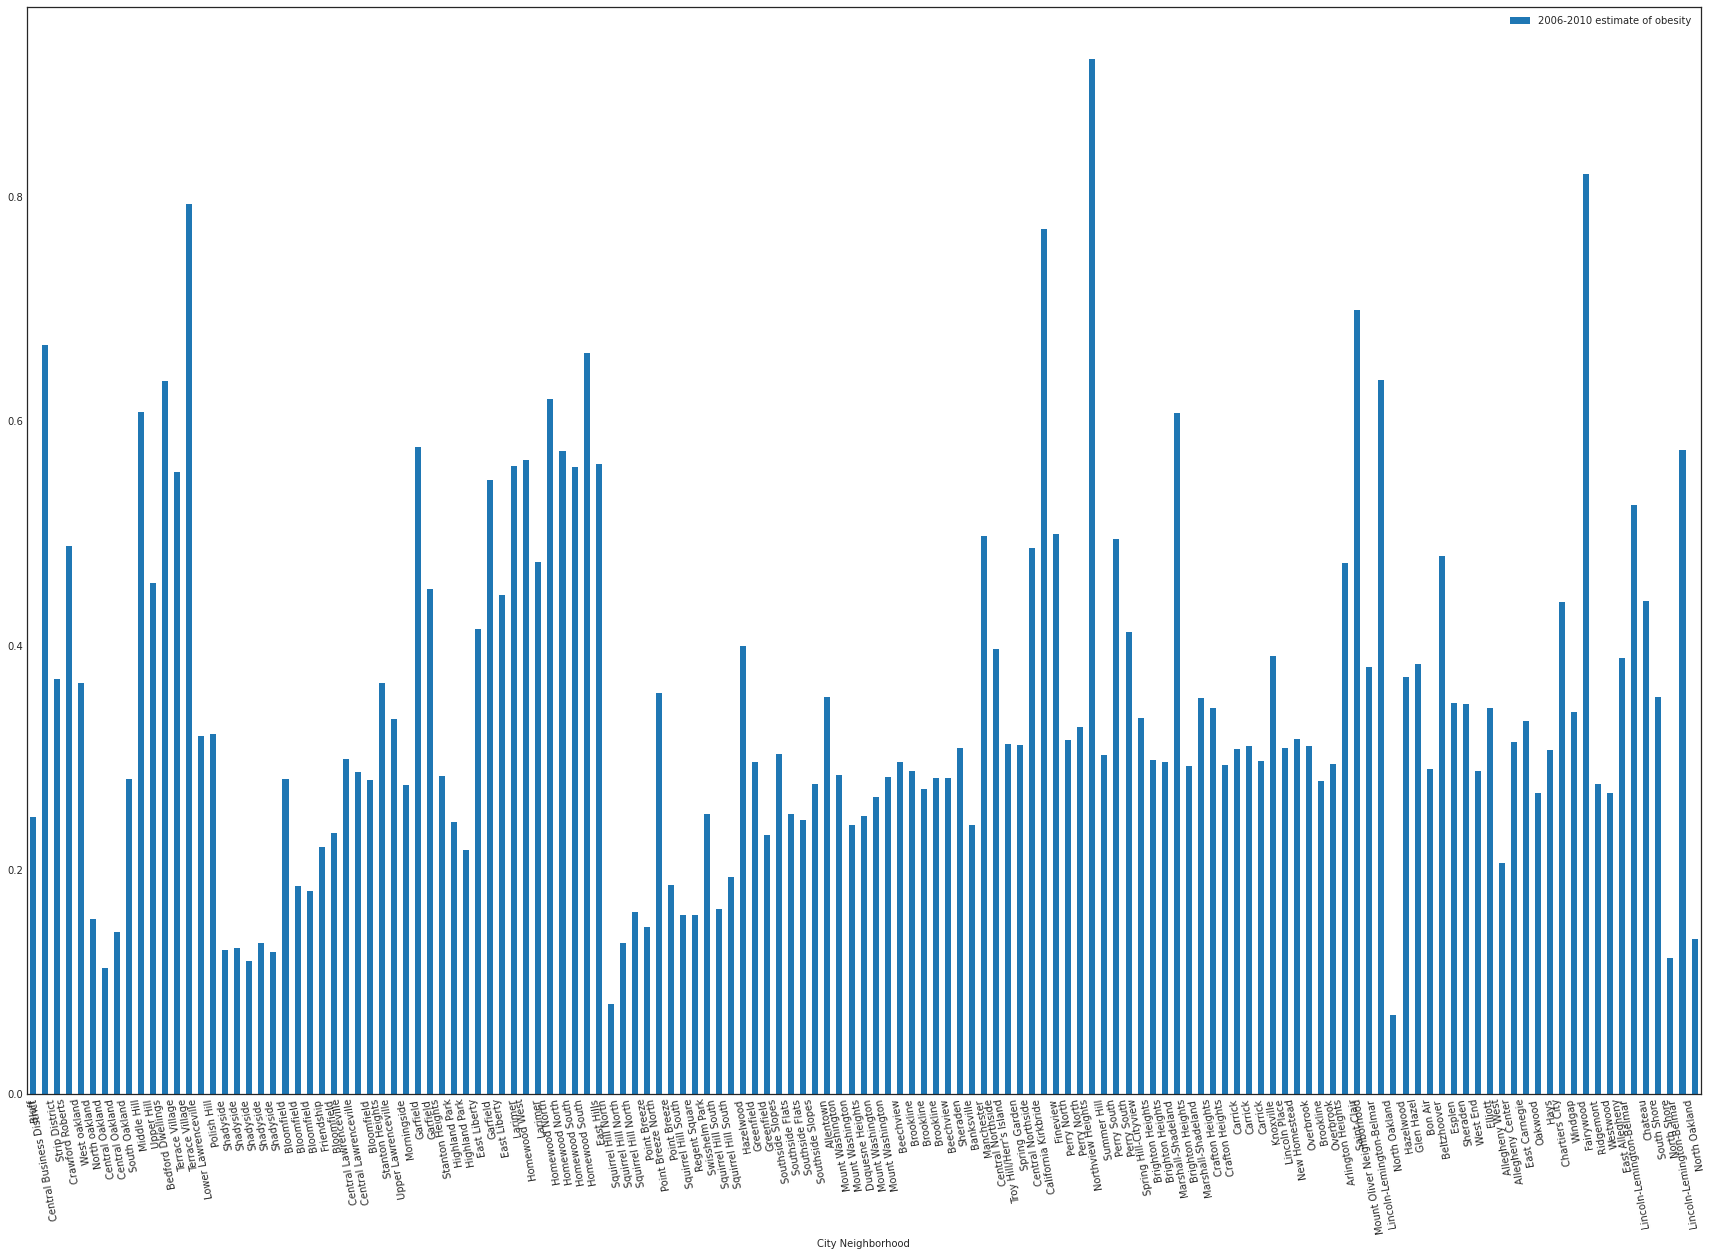

In [15]:

data2.plot(x='City Neighborhood', kind='bar', rot=100, figsize=(30,20) )

The graph above contains too much data to anylyze at once, but since it is in ascending order, we can see that the neighborhoods with the lowest rates are under at least 0.2.

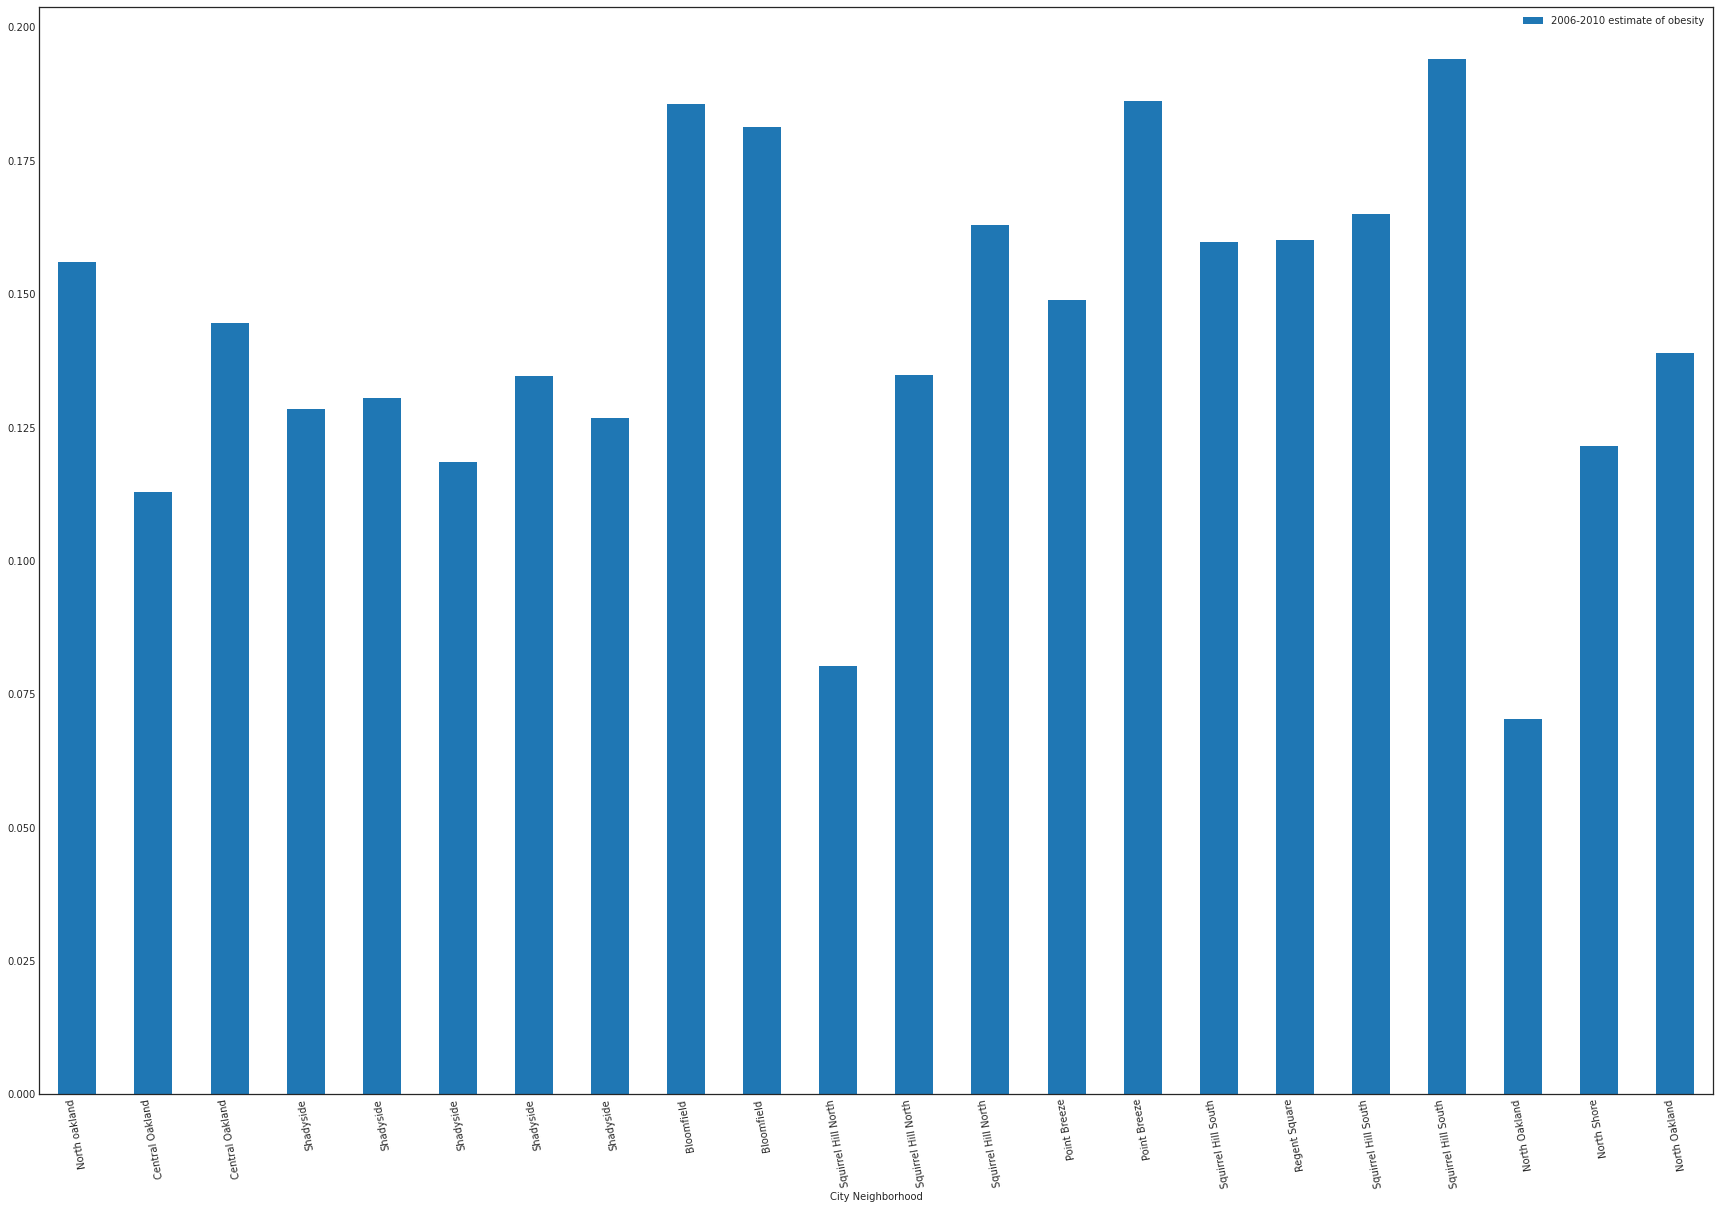

In [16]:
best= data2[data2['2006-2010 estimate of obesity'] < 0.2]

best.plot(x='City Neighborhood', kind='bar', rot=100, figsize=(30,20))


## Conclusion

Once we narrow down the graph, it is very simple to see the neighborhoods with the lowest obesity rates. North Oakland and Squirrel Hill North have the lowest obesity rates, both with rates under 0.1. Central Oakland, Shadyside, and North Shore are all close behind with rates just under 0.125. 

Obesity rates is a good indicator of how healthy, active and lively a neighborhood is. So when deciding which neighborhood is the best, obesity rates can be an important factor-- especially when chosing a neighborhood to potentially raise a family in. Therefore, North Oakland and Squirrel Hill North can be considered the "best," in terms of obsesity. These neighborhoods are similar in that they are both located east of downtown, both being more residential.

In [17]:
# calculate scores and add to totals
od = data2.groupby("City Neighborhood").mean().sort_values("2006-2010 estimate of obesity").to_dict()['2006-2010 estimate of obesity']
od = avg_names(od)
od = pd.DataFrame.from_dict(od,"index").sort_values(0,ascending=False).to_dict()[0]
totals=add_to_totals(od,totals)
pd.DataFrame.from_dict(totals,"index").sort_values(0,ascending=False)

,0
Regent Square,2.866266
Swisshelm Park,2.699270
Ridgemont,2.619797
Oakwood,2.512718
Allegheny West,2.506067
...,...
Knoxville,0.398393
Marshall-Shadeland,0.320910
Lincoln-Lemington-Belmar,0.261644
Homewood South,0.209969


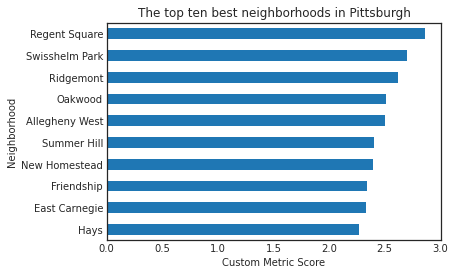

In [18]:
#final totals plot
totals = pd.DataFrame.from_dict(totals,"index")
ax = totals.sort_values(0).tail(10).plot(kind="barh",
title="The top ten best neighborhoods in Pittsburgh")
ax.get_legend().remove()
plt.xlabel("Custom Metric Score")
plt.ylabel("Neighborhood")
plt.show()

# Conclusion
Based on the plot of the best totals in our metric, it appears that Regent Square is the neighborhood that does best overall in terms of arrests, obesity, and building code violations. 2nd is Swisshelm Park, and third is Ridgemont. These are different results from many other groups, which points out just how important the factors in a metric are, and how something like a "bestness" or "happiness" metric could be heavily subjective.